In [89]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import scipy
from numpy import linalg as LA

# I collaborated with Jingyi Jia throughout the assignment!

data_address = "../hw1/LSDA_data/mnist/MNIST_data.npy"
data_label = "../hw1/LSDA_data/mnist/MNIST_labels.npy"
data = np.float64(np.load(data_address)/255)
label = np.float32(np.load(data_label))

split1 = int(0.6 * len(data))
split2 = int(0.8 * len(data))
train = data[:split1]
dev = data[split1:split2]
test = data[split2:]

train_label = label[:split1]
dev_label = label[split1:split2]
test_label = label[split2:]


# binarize the dataset as like HW3
data_binarized = (data > 0.5).astype(int)
# estimate a separate mixture model for each class with M = 1,5,10,20. 



def show_images(examples, nrows, ncols):
    plt.figure(figsize=(ncols*2, nrows*2))
    for i in range(nrows*ncols):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(examples[i].reshape((28,28)), cmap='gray')
        plt.axis('off')
    plt.show()

In [90]:
def EMAlgo (data, M):
    pi = None
    p = None 
    loss = None
    prev = None
    # initialize a random NxM positive matrix W with rows that add up to 1
    N = len(data)
    W = np.random.rand(len(data), M)
    W = W/(np.sum(W,axis=1)[np.newaxis]).T
    threshold = 1e-3

    # implement the EM algorithm according to lecture week3 day1 slide 6
    for i in range(100):
        pi = 1/(N + 2) * (np.sum(W,axis=0)+1) #each iteration the EM algorithm updates pi_new
        p = (data.T @ W + 1) @ np.diag(1/(np.sum(W, axis=0)+2)) #result from Q2 quesiton(-1)

        # define loss function and compute the differences between successive iterations:

        if i > 0:
            prev = loss 
            g_p = np.sum(np.exp(g),axis=1)
            loss = np.sum(np.log(g_p))
            print('{0}-th iteration has loss {1:.2F}'.format(i,loss))
            if prev != None and np.abs(loss- prev) / np.abs(prev) < threshold: 
                print("EMAlgo completed. The result is: ")
                plt.figure(figsize=(M,M))
                for m in range(M):
                    plt.subplot(1, M+1, m+1)
                    plt.imshow(p[:,m].reshape(28,28), cmap='gray')
                    plt.axis('off')
                plt.show()
                break
        # for m in range(M):
        #     plt.subplot(1, M+1, m+1)
        #     plt.imshow(p[:,m].reshape(28,28), cmap='gray')
        #     plt.axis('off')
        # plt.show()

        g = np.dot(data, np.log(p))
        g = g +  np.dot((1-data), np.log(1-p)) 
        log_pi = np.diag(np.log(pi))
        g = g +  np.ones((N,M)) @ log_pi
        g_max = np.max(g, axis=1)
        diff_num = np.exp(g-g_max[np.newaxis].T)
        W = diff_num / (np.sum(diff_num,axis=1))[np.newaxis].T
    return p + 1e-20, pi

def PCA(X,k):
    # assume that the given vector are column vectors. If not, pass down column vectors 
    X_bar = np.mean(X, axis=0)
    X_tilde = X - X_bar
    S = np.cov(X_tilde.T)
    # compute the eigenvalues along with the eigenvectors
    # since S is symmetric we can use eigh instead of eig
    w,v = LA.eigh(S)
    # sort the pair of eigenvalues and eigenvectors
    # credti to https://stackoverflow.com/questions/8092920/sort-eigenvalues-and-associated-eigenvectors-after-using-numpy-linalg-eig-in-pyt for sorting eigenvalues
    idx = w.argsort()[::-1]
    w = w[idx]
    v = v[:,idx]
    return v[:,:k], w[:k]

# import functions from hw3
# import PCA function for the PC's computed 

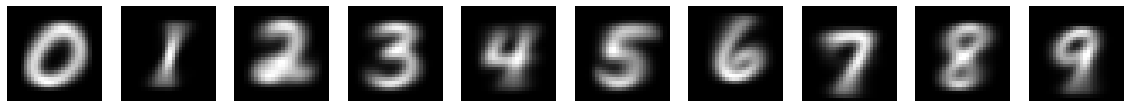

error_rate is:  0.13642857142857143


In [91]:
# question 2.1
# set M = 1,5,10,20
# in total we have M * 10 models  


# case M = 1, so no need to call upon EM algorithm
M = 1
pi_c = 1/10


def Bernoulli (X):
    # let n be the number of binary observations 
    n,d = X.shape 
    sum = 0
    for i in range(n):
        # print("X[i] is:", X[i])
        sum += X[i]
    p = sum / n
    # return the probability of a certain digit 
    return p  
    
# classify ten digits
numbers = [[] for i in range(10)]
for i in range(len(train)):
    numbers[int(train_label[i])].append(train[i])


P = np.array([Bernoulli(np.array(X)) for X in numbers])
P += 1e-20
# avoid underflow
# plot the dataset 
show_images(P, 1,10)

# make prediction and estimate the dataset using MLE and Bayes rules



likelihood = [np.array(test @ np.log(P)[i].T + (1-test) @ np.log(1-P)[i].T) for i in range(len(P))]
classification = np.argmax(likelihood, axis=0)
error = classification - test_label
error_rate = np.count_nonzero(error)/ (0.2 * len(data))
print("error_rate is: ", error_rate)







Case M = 5
1-th iteration has loss -1113046.08
2-th iteration has loss -1025602.02
3-th iteration has loss -937519.81
4-th iteration has loss -932780.41
5-th iteration has loss -930528.23
6-th iteration has loss -928830.84
7-th iteration has loss -927671.93
8-th iteration has loss -926910.91
EMAlgo completed. The result is: 


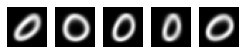

1-th iteration has loss -619132.32
2-th iteration has loss -522606.09
3-th iteration has loss -440991.90
4-th iteration has loss -428013.49
5-th iteration has loss -424257.74
6-th iteration has loss -422782.26
7-th iteration has loss -422138.83
8-th iteration has loss -421841.50
EMAlgo completed. The result is: 


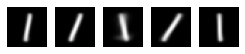

1-th iteration has loss -1134829.06
2-th iteration has loss -1108367.58
3-th iteration has loss -1035077.35
4-th iteration has loss -1022955.77
5-th iteration has loss -1017231.18
6-th iteration has loss -1013124.33
7-th iteration has loss -1009806.58
8-th iteration has loss -1007050.98
9-th iteration has loss -1004846.13
10-th iteration has loss -1003027.95
11-th iteration has loss -1001608.07
12-th iteration has loss -1000475.91
13-th iteration has loss -999510.02
EMAlgo completed. The result is: 


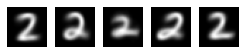

1-th iteration has loss -1065693.83
2-th iteration has loss -1020444.32
3-th iteration has loss -944710.31
4-th iteration has loss -933265.80
5-th iteration has loss -931066.14
6-th iteration has loss -930303.72
EMAlgo completed. The result is: 


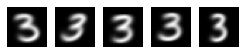

1-th iteration has loss -943361.07
2-th iteration has loss -912291.26
3-th iteration has loss -839963.06
4-th iteration has loss -822457.29
5-th iteration has loss -816801.16
6-th iteration has loss -813900.43
7-th iteration has loss -812458.39
8-th iteration has loss -811502.75
9-th iteration has loss -810903.10
EMAlgo completed. The result is: 


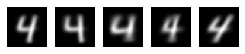

1-th iteration has loss -975642.93
2-th iteration has loss -908832.24
3-th iteration has loss -833678.79
4-th iteration has loss -822942.12
5-th iteration has loss -820038.19
6-th iteration has loss -818679.65
7-th iteration has loss -817897.62
EMAlgo completed. The result is: 


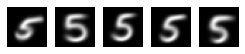

1-th iteration has loss -985195.82
2-th iteration has loss -908543.85
3-th iteration has loss -818105.30
4-th iteration has loss -810750.57
5-th iteration has loss -808618.31
6-th iteration has loss -807670.62
7-th iteration has loss -807209.75
EMAlgo completed. The result is: 


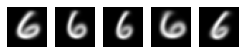

1-th iteration has loss -916708.12
2-th iteration has loss -851893.04
3-th iteration has loss -776836.62
4-th iteration has loss -770013.14
5-th iteration has loss -767664.85
6-th iteration has loss -766091.95
7-th iteration has loss -764986.32
8-th iteration has loss -764106.13
9-th iteration has loss -763269.56
10-th iteration has loss -762452.97
11-th iteration has loss -761742.72
EMAlgo completed. The result is: 


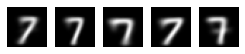

1-th iteration has loss -1031988.54
2-th iteration has loss -972324.16
3-th iteration has loss -913596.78
4-th iteration has loss -910055.08
5-th iteration has loss -909148.27
EMAlgo completed. The result is: 


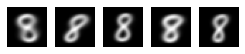

1-th iteration has loss -916831.77
2-th iteration has loss -875285.37
3-th iteration has loss -778187.27
4-th iteration has loss -767619.66
5-th iteration has loss -764016.10
6-th iteration has loss -761843.56
7-th iteration has loss -759892.58
8-th iteration has loss -758687.83
9-th iteration has loss -757936.90
EMAlgo completed. The result is: 


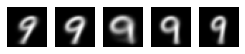

error_rate is:  0.09971428571428571
Case M = 10
1-th iteration has loss -1114676.61
2-th iteration has loss -1013063.85
3-th iteration has loss -899548.72
4-th iteration has loss -884206.18
5-th iteration has loss -877309.47
6-th iteration has loss -873835.10
7-th iteration has loss -871672.92
8-th iteration has loss -870512.54
9-th iteration has loss -869867.58
EMAlgo completed. The result is: 


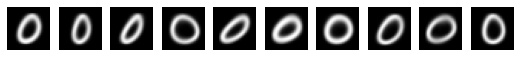

1-th iteration has loss -621694.69
2-th iteration has loss -550585.41
3-th iteration has loss -418912.47
4-th iteration has loss -402127.54
5-th iteration has loss -397810.59
6-th iteration has loss -395366.25
7-th iteration has loss -393731.62
8-th iteration has loss -392952.51
9-th iteration has loss -392556.55
10-th iteration has loss -392318.64
EMAlgo completed. The result is: 


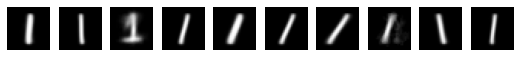

1-th iteration has loss -1136045.97
2-th iteration has loss -1079557.98
3-th iteration has loss -994267.16
4-th iteration has loss -971943.84
5-th iteration has loss -966003.39
6-th iteration has loss -962607.35
7-th iteration has loss -959792.67
8-th iteration has loss -957246.34
9-th iteration has loss -955332.22
10-th iteration has loss -954023.03
11-th iteration has loss -952961.88
12-th iteration has loss -952184.20
EMAlgo completed. The result is: 


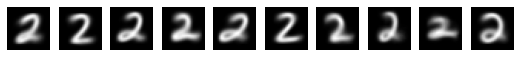

1-th iteration has loss -1067242.35
2-th iteration has loss -1008466.84
3-th iteration has loss -908035.56
4-th iteration has loss -896440.32
5-th iteration has loss -892639.26
6-th iteration has loss -890551.19
7-th iteration has loss -888785.87
8-th iteration has loss -887553.19
9-th iteration has loss -886825.88
EMAlgo completed. The result is: 


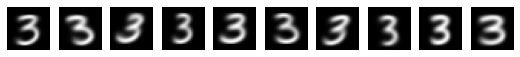

1-th iteration has loss -944780.43
2-th iteration has loss -891053.75
3-th iteration has loss -787924.75
4-th iteration has loss -773761.53
5-th iteration has loss -768269.76
6-th iteration has loss -765088.54
7-th iteration has loss -763284.58
8-th iteration has loss -762266.15
9-th iteration has loss -761720.93
EMAlgo completed. The result is: 


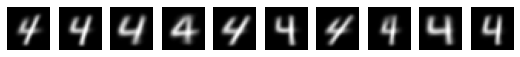

1-th iteration has loss -977203.47
2-th iteration has loss -915744.51
3-th iteration has loss -799380.06
4-th iteration has loss -787981.44
5-th iteration has loss -785268.96
6-th iteration has loss -783784.89
7-th iteration has loss -782681.77
8-th iteration has loss -781745.60
9-th iteration has loss -780922.79
10-th iteration has loss -780321.19
EMAlgo completed. The result is: 


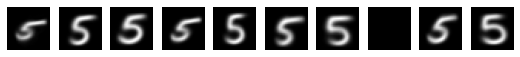

1-th iteration has loss -987089.72
2-th iteration has loss -922098.19
3-th iteration has loss -802879.29
4-th iteration has loss -784361.30
5-th iteration has loss -776250.39
6-th iteration has loss -771679.84
7-th iteration has loss -768824.89
8-th iteration has loss -766881.78
9-th iteration has loss -765563.97
10-th iteration has loss -764695.75
11-th iteration has loss -764112.57
EMAlgo completed. The result is: 


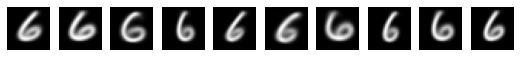

1-th iteration has loss -918536.39
2-th iteration has loss -856470.95
3-th iteration has loss -744928.65
4-th iteration has loss -728092.70
5-th iteration has loss -720249.48
6-th iteration has loss -716314.85
7-th iteration has loss -714312.97
8-th iteration has loss -713138.03
9-th iteration has loss -712314.81
10-th iteration has loss -711639.89
EMAlgo completed. The result is: 


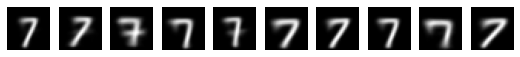

1-th iteration has loss -1033834.29
2-th iteration has loss -984210.01
3-th iteration has loss -889393.13
4-th iteration has loss -873579.25
5-th iteration has loss -869648.69
6-th iteration has loss -868027.50
7-th iteration has loss -867096.32
8-th iteration has loss -866583.54
EMAlgo completed. The result is: 


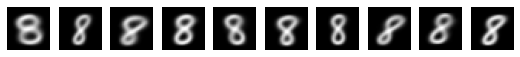

1-th iteration has loss -918632.60
2-th iteration has loss -868487.11
3-th iteration has loss -746527.46
4-th iteration has loss -731114.16
5-th iteration has loss -725990.69
6-th iteration has loss -722681.56
7-th iteration has loss -721118.07
8-th iteration has loss -720309.61
9-th iteration has loss -719624.08
EMAlgo completed. The result is: 


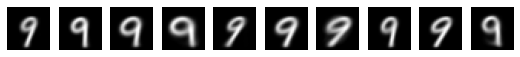

error_rate is:  0.0735
Case M = 20
1-th iteration has loss -1118338.58
2-th iteration has loss -1007742.17
3-th iteration has loss -871669.46
4-th iteration has loss -855072.51
5-th iteration has loss -848805.09
6-th iteration has loss -845089.81
7-th iteration has loss -842600.94
8-th iteration has loss -840879.67
9-th iteration has loss -839682.94
10-th iteration has loss -838971.34
EMAlgo completed. The result is: 


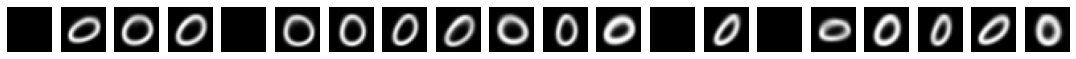

1-th iteration has loss -626426.38
2-th iteration has loss -546608.60
3-th iteration has loss -409736.73
4-th iteration has loss -397125.22
5-th iteration has loss -392988.89
6-th iteration has loss -390253.73
7-th iteration has loss -388528.20
8-th iteration has loss -386899.35
9-th iteration has loss -385231.24
10-th iteration has loss -384129.41
11-th iteration has loss -383280.62
12-th iteration has loss -382822.76
13-th iteration has loss -382560.57
EMAlgo completed. The result is: 


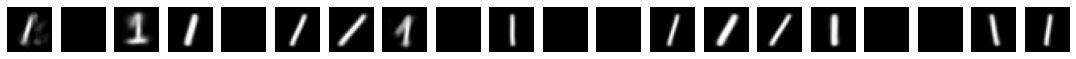

1-th iteration has loss -1139137.73
2-th iteration has loss -1081229.60
3-th iteration has loss -956653.46
4-th iteration has loss -935755.36
5-th iteration has loss -926235.70
6-th iteration has loss -921761.79
7-th iteration has loss -919458.79
8-th iteration has loss -918273.97
9-th iteration has loss -917424.77
EMAlgo completed. The result is: 


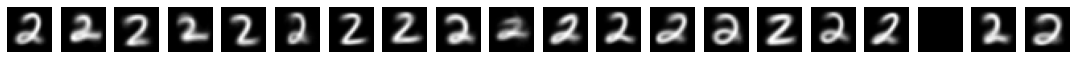

1-th iteration has loss -1070587.50
2-th iteration has loss -1009191.63
3-th iteration has loss -891985.93
4-th iteration has loss -874625.57
5-th iteration has loss -867979.56
6-th iteration has loss -864912.66
7-th iteration has loss -862687.95
8-th iteration has loss -860982.66
9-th iteration has loss -859846.46
10-th iteration has loss -858857.26
11-th iteration has loss -857931.09
12-th iteration has loss -857138.87
EMAlgo completed. The result is: 


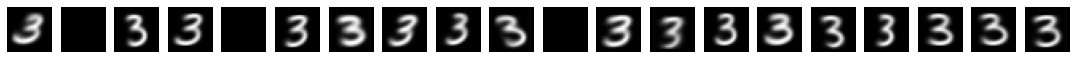

1-th iteration has loss -948195.42
2-th iteration has loss -891252.68
3-th iteration has loss -775305.77
4-th iteration has loss -751224.27
5-th iteration has loss -742457.90
6-th iteration has loss -738218.29
7-th iteration has loss -735650.31
8-th iteration has loss -733979.71
9-th iteration has loss -732837.01
10-th iteration has loss -732044.57
11-th iteration has loss -731330.05
EMAlgo completed. The result is: 


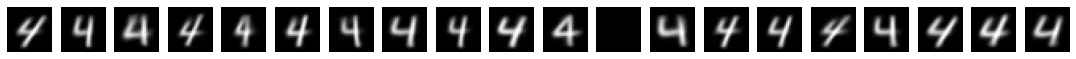

1-th iteration has loss -980293.03
2-th iteration has loss -895870.81
3-th iteration has loss -781364.65
4-th iteration has loss -766490.07
5-th iteration has loss -761003.67
6-th iteration has loss -757950.01
7-th iteration has loss -756054.57
8-th iteration has loss -754577.39
9-th iteration has loss -753504.98
10-th iteration has loss -752657.19
11-th iteration has loss -751938.31
EMAlgo completed. The result is: 


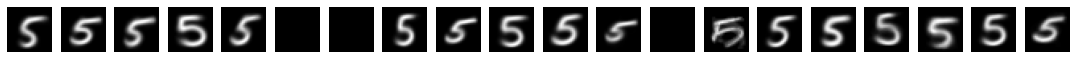

1-th iteration has loss -990327.34
2-th iteration has loss -893126.82
3-th iteration has loss -773627.35
4-th iteration has loss -758292.83
5-th iteration has loss -751277.36
6-th iteration has loss -746276.22
7-th iteration has loss -742914.33
8-th iteration has loss -740791.30
9-th iteration has loss -739264.15
10-th iteration has loss -737967.61
11-th iteration has loss -736743.47
12-th iteration has loss -735680.30
13-th iteration has loss -734908.41
14-th iteration has loss -734360.38
EMAlgo completed. The result is: 


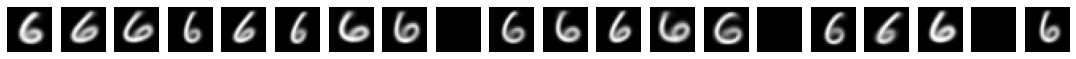

1-th iteration has loss -922037.71
2-th iteration has loss -853531.18
3-th iteration has loss -712540.53
4-th iteration has loss -696379.83
5-th iteration has loss -691509.29
6-th iteration has loss -689237.38
7-th iteration has loss -687623.58
8-th iteration has loss -686301.56
9-th iteration has loss -685244.55
10-th iteration has loss -684346.71
11-th iteration has loss -683575.14
12-th iteration has loss -682936.09
EMAlgo completed. The result is: 


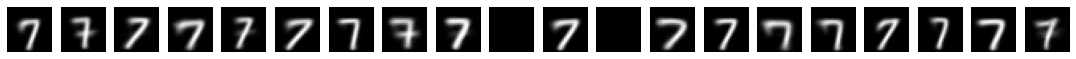

1-th iteration has loss -1037257.53
2-th iteration has loss -976027.96
3-th iteration has loss -879491.37
4-th iteration has loss -862107.23
5-th iteration has loss -854741.05
6-th iteration has loss -851135.36
7-th iteration has loss -849135.10
8-th iteration has loss -847908.96
9-th iteration has loss -847004.22
10-th iteration has loss -846277.45
EMAlgo completed. The result is: 


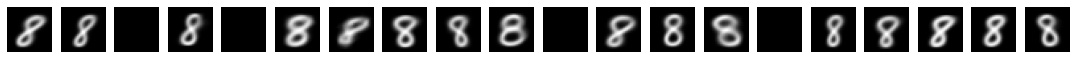

1-th iteration has loss -922090.94
2-th iteration has loss -831309.27
3-th iteration has loss -725267.84
4-th iteration has loss -705330.43
5-th iteration has loss -698214.41
6-th iteration has loss -694734.03
7-th iteration has loss -692839.55
8-th iteration has loss -691609.09
9-th iteration has loss -690720.58
10-th iteration has loss -690080.54
EMAlgo completed. The result is: 


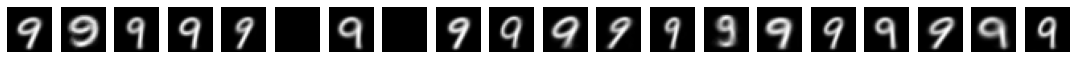

error_rate is:  0.05821428571428571
Optimal M is: 20


In [106]:
# apply EM algorithm
M_list = [5,10,20] 
error_list = []
for M in M_list:
    print("Case M =", M)
    likelihood = []
    for i in range(len(numbers)):
        p, pi = EMAlgo(np.array(numbers[i]), M)
        # qs.append(1-p)
        result = np.exp(dev @ np.log(np.array(p)) + (1-dev) @ np.log(1-np.array(p))) 
        likelihood.append(result @ pi.T)
    
    classification = np.argmax(np.array(likelihood), axis=0)
    error = classification - dev_label
    error_rate = np.count_nonzero(error)/ (len(dev_label))
    error_list.append(error_rate)
    print("error_rate is: ", error_rate)
idx = np.argmin(error_list,axis=0)
winner = M_list[idx]
print("Optimal M is:", winner)

1-th iteration has loss -1118399.98
2-th iteration has loss -1019033.13
3-th iteration has loss -876097.45
4-th iteration has loss -854837.21
5-th iteration has loss -846976.57
6-th iteration has loss -842358.02
7-th iteration has loss -839533.52
8-th iteration has loss -837518.53
9-th iteration has loss -835966.95
10-th iteration has loss -834612.53
11-th iteration has loss -833343.54
12-th iteration has loss -832421.69
13-th iteration has loss -831796.84
EMAlgo completed. The result is: 


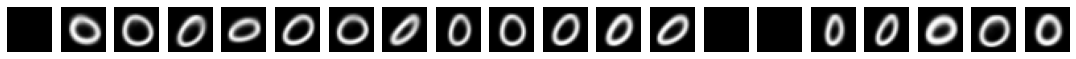

1-th iteration has loss -626168.92
2-th iteration has loss -531912.54
3-th iteration has loss -399608.21
4-th iteration has loss -388680.56
5-th iteration has loss -385368.81
6-th iteration has loss -383484.02
7-th iteration has loss -382281.50
8-th iteration has loss -381452.67
9-th iteration has loss -380936.94
10-th iteration has loss -380571.58
EMAlgo completed. The result is: 


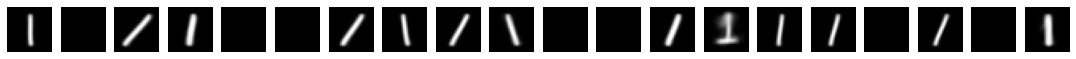

1-th iteration has loss -1139207.03
2-th iteration has loss -1086955.67
3-th iteration has loss -953964.47
4-th iteration has loss -930504.42
5-th iteration has loss -923583.87
6-th iteration has loss -920198.97
7-th iteration has loss -918094.03
8-th iteration has loss -916837.41
9-th iteration has loss -915980.83
EMAlgo completed. The result is: 


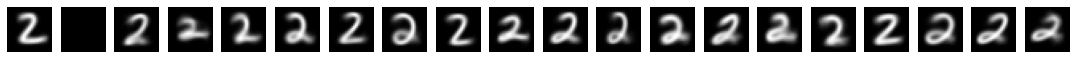

1-th iteration has loss -1070442.54
2-th iteration has loss -998767.20
3-th iteration has loss -884456.70
4-th iteration has loss -869912.67
5-th iteration has loss -864015.40
6-th iteration has loss -860906.36
7-th iteration has loss -859076.16
8-th iteration has loss -857720.05
9-th iteration has loss -856767.08
10-th iteration has loss -856040.23
EMAlgo completed. The result is: 


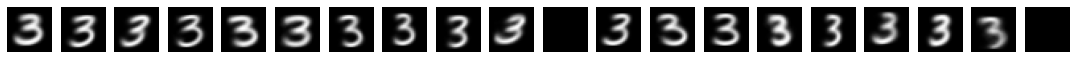

1-th iteration has loss -948282.28
2-th iteration has loss -909409.37
3-th iteration has loss -763813.28
4-th iteration has loss -746909.49
5-th iteration has loss -741665.94
6-th iteration has loss -737890.38
7-th iteration has loss -734859.84
8-th iteration has loss -732733.07
9-th iteration has loss -731337.86
10-th iteration has loss -730405.56
11-th iteration has loss -729723.45
EMAlgo completed. The result is: 


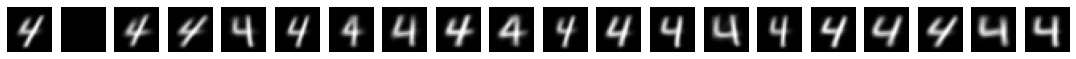

1-th iteration has loss -980349.56
2-th iteration has loss -897684.69
3-th iteration has loss -779561.00
4-th iteration has loss -764208.26
5-th iteration has loss -758341.93
6-th iteration has loss -754273.64
7-th iteration has loss -751848.92
8-th iteration has loss -750254.03
9-th iteration has loss -749273.98
10-th iteration has loss -748526.99
EMAlgo completed. The result is: 


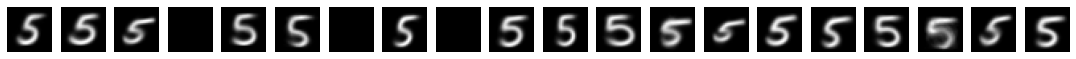

1-th iteration has loss -990374.79
2-th iteration has loss -884907.34
3-th iteration has loss -780949.13
4-th iteration has loss -758836.24
5-th iteration has loss -749838.42
6-th iteration has loss -744947.76
7-th iteration has loss -742333.04
8-th iteration has loss -740708.52
9-th iteration has loss -739580.22
10-th iteration has loss -738864.74
EMAlgo completed. The result is: 


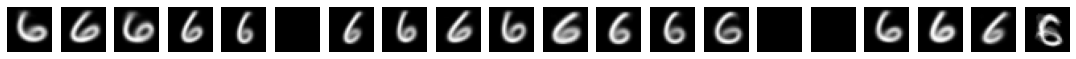

1-th iteration has loss -921825.68
2-th iteration has loss -836922.47
3-th iteration has loss -723426.75
4-th iteration has loss -703646.18
5-th iteration has loss -695751.52
6-th iteration has loss -690889.80
7-th iteration has loss -687023.56
8-th iteration has loss -684904.85
9-th iteration has loss -683802.02
10-th iteration has loss -683053.19
11-th iteration has loss -682476.33
EMAlgo completed. The result is: 


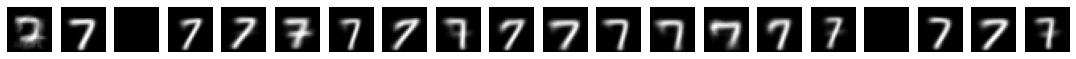

1-th iteration has loss -1037376.02
2-th iteration has loss -992996.79
3-th iteration has loss -868430.14
4-th iteration has loss -852426.72
5-th iteration has loss -846714.03
6-th iteration has loss -843883.90
7-th iteration has loss -842132.86
8-th iteration has loss -840858.19
9-th iteration has loss -839741.83
10-th iteration has loss -838955.14
EMAlgo completed. The result is: 


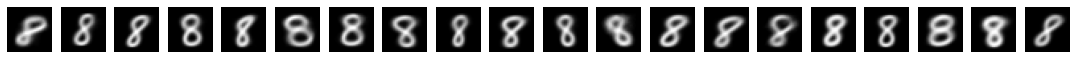

1-th iteration has loss -922251.51
2-th iteration has loss -849754.37
3-th iteration has loss -726557.48
4-th iteration has loss -706327.84
5-th iteration has loss -699982.53
6-th iteration has loss -697251.99
7-th iteration has loss -695704.59
8-th iteration has loss -694495.88
9-th iteration has loss -693602.71
10-th iteration has loss -693023.74
EMAlgo completed. The result is: 


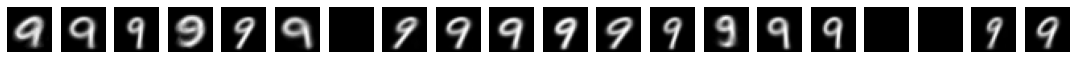

error_rate is:  0.047785714285714286


In [107]:
# retrain:
combined = np.concatenate((train, dev), axis=0)
combined_label = np.concatenate((train_label, dev_label), axis=0)


numbers = [[] for i in range(10)]
for i in range(len(combined)):
    numbers[int(combined_label[i])].append(combined[i])


likelihood = []
for i in range(len(numbers)):
    p, pi = EMAlgo(np.array(numbers[i]), M)
    # qs.append(1-p)
    result = np.exp(test @ np.log(np.array(p)) + (1-test) @ np.log(1-np.array(p))) 
    likelihood.append(result @ pi.T)

classification = np.argmax(np.array(likelihood), axis=0)
error = classification - test_label
error_rate = np.count_nonzero(error)/ (len(test_label))
print("error_rate is: ", error_rate)

In [93]:
#logistic regression:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

C_list = [10,100,1000,10000,100000,1000000]
outcome = []
for C in C_list:
    lg=LogisticRegression(fit_intercept=True, C=C, penalty='l2', multi_class='multinomial', solver='lbfgs', max_iter=100)
    lg.fit(train, train_label)
    error_rate = 1 - lg.score(dev, dev_label)
    outcome.append(error_rate)
    print("C is: ", C, " and error rate is: ", error_rate)

idx = np.argmin(np.array(outcome), axis=0)
winner = C_list[idx]

C is:  10  and error rate is:  0.08778571428571424
C is:  100  and error rate is:  0.08757142857142852
C is:  1000  and error rate is:  0.08785714285714286
C is:  10000  and error rate is:  0.0872857142857143
C is:  100000  and error rate is:  0.08771428571428574
C is:  1000000  and error rate is:  0.08699999999999997


In [94]:
lg_winner = LogisticRegression(fit_intercept=True, C=C_list[idx], penalty='l2', multi_class='multinomial', solver='lbfgs', max_iter=100)
lg_winner.fit(combined, combined_label)

LogisticRegression(C=1000000, multi_class='multinomial')

In [95]:
error =  1- lg_winner.score(test, test_label)
print("The error rate after retrain is:", error)

The error rate after retrain is: 0.06514285714285717


My EM algorithm gives an error rate at around 0.047785714285714286 with M = 20, which is slightly better than the Multinomial error rate at around 0.06514285714285717. 

number of components vs error rate


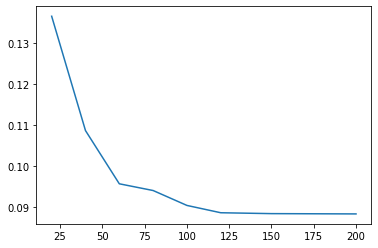

In [96]:
# PCA projections
# 
import pylab as py

components = [20, 40, 60, 80, 100, 120, 150, 200]
error_list = []
for component in components:
    eigenvectors, _ = PCA(train, component)
    projection_train = train @ eigenvectors
    projection_dev = dev @ eigenvectors
    
    lg = LogisticRegression(fit_intercept=True, C=winner, penalty='l2', multi_class='multinomial', solver='lbfgs')
    lg.fit(projection_train, train_label)
    error =  1- lg.score(projection_dev, dev_label)
    error_list.append(error)

py.plot(components, error_list)
print("number of components vs error rate")
py.show()

From the graph above we can tell that after 125 components, the error rate  stays mostly flat.

In [101]:
C_list = [10,100,1000,10000,100000,1000000]
outcome = []

eigenvectors, _ = PCA(train, 120)
projection_train = train @ eigenvectors
projection_dev = dev @ eigenvectors

for C in C_list:
    lg=LogisticRegression(fit_intercept=True, C=C, penalty='l2', multi_class='multinomial', solver='lbfgs', max_iter=100)
    lg.fit(projection_train, train_label)
    error =  1- lg.score(projection_dev, dev_label)
    outcome.append(error)
    print("C is: ", C, " and error rate is: ", error_rate)

idx = np.argmin(np.array(outcome), axis=0)
winner = C_list[idx]

C is:  10  and error rate is:  0.08699999999999997
C is:  100  and error rate is:  0.08699999999999997
C is:  1000  and error rate is:  0.08699999999999997
C is:  10000  and error rate is:  0.08699999999999997
C is:  100000  and error rate is:  0.08699999999999997
C is:  1000000  and error rate is:  0.08699999999999997


In [102]:
projection_test = test @ eigenvectors

projection_combined = np.concatenate((train @ eigenvectors, dev @ eigenvectors), axis=0)

lg=LogisticRegression(fit_intercept=True, C=C, penalty='l2', multi_class='multinomial', solver='lbfgs', max_iter=100)
lg.fit(projection_combined, combined_label)
error = 1- lg.score(projection_test, test_label)
print("Error after retrain is:", error)


Error after retrain is: 0.06692857142857145


It appears that the error rate of the raw features (0.06514285714285717) is about the same as the error rate of the Principal Components (0.06692857142857145). I think this is because the principal components are large enough so that it captures almost all the important information.